## 在庫デバイスのリストを読み込んでLast checkinなど特徴を理解する

In [1]:
import pandas as pd
import numpy as np

In [2]:
excelfile = 'ロジ在庫タブレット一覧_201119.xlsx'
df_stock = pd.read_excel(excelfile, engine='openpyxl')
df_stock.head()

倉庫名 資産ステータス             商品名称  数量 資産管理番号        シリアル番号             IMEI  \
0  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC1024LMT8  353178106983338   
1  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102ALMT8  353178107930569   
2  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102BLMT8  353178107927003   
3  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102DLMT8  353178108359453   
4  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102FLMT8  353178109354354   

         入庫日  
0 2020-01-20  
1 2020-01-20  
2 2020-01-20  
3 2020-01-20  
4 2020-01-20

In [3]:
len(df_stock)

3025

### MDMから落としたリストを読み込む

In [4]:
def read_mdm_device_list(csvfile, MDM):
    df = pd.read_csv(csvfile)
    df.drop(df.index[[-1]], inplace=True) # 最終行はゴミなので削除
    df.dropna(how='all', axis=1, inplace=True) #すべてNaNの列を削除
    #df.drop_duplicates(subset='SerialNumber', keep='first', inplace=True) # SerialNumberの重複は除く
    df['IMEI'] = df['IMEI'].str.replace(' ', '') # IMEIの途中の空白を削除
    df['MDM'] = MDM  
    return df

In [5]:
df_mdm1 = read_mdm_device_list('all_devices_app1.csv', 'MDM1')
df_mdm1.describe()

id  DeviceName OSVersion  SerialNumber    last_checkin_time  \
count   4595        4595      4595          4595                 4245   
unique  4595        4504        65          4595                 4239   
top     6053  iPod touch    11.4.1  F9FVF1XMGHMP  1970-01-01 00:00:00   
freq       1          45       559             1                    7   

                    last_push_time                    ICCID             IMEI  \
count                         4595                     1948             2162   
unique                         838                     1937             2162   
top     2020-11-17 04:08:35.324866  8981 2005 1054 0525 085  359276067486517   
freq                            60                        3                1   

         full_name                  updated_at                  created_at  \
count         3862                        4595                        4595   
unique          11                        4247                        4595   
top     photouser5  2020-11-14 15:05:13.123002  2018-10-31 06:03:11.453409   
freq           408                         349                           1   

         MDM  
count   4595  
unique     1  
top     MDM1  
freq    4595

In [6]:
df_mdm2 = read_mdm_device_list('all_devices_app2.csv', 'MDM2')
df_mdm2.describe()

id  DeviceName OSVersion  SerialNumber           last_checkin_time  \
count   3324        3320      3322          3324                        2786   
unique  3324        3270        39          3324                        2786   
top     2654  iPod touch    12.1.1  F9FX22HDGHMP  2020-10-12 22:54:36.180373   
freq       1          21       613             1                           1   

                    last_push_time                    ICCID             IMEI  \
count                         3324                     1476             1762   
unique                         651                     1473             1762   
top     2020-09-02 06:55:37.196742  8981 1000 0581 0595 067  354995072414611   
freq                            60                        2                1   

           full_name                  updated_at                  created_at  \
count           3293                        3324                        3324   
unique            14                        2782                        3324   
top     photouser003  2020-11-14 15:55:55.227138  2019-02-15 02:15:18.195985   
freq             365                         543                           1   

         MDM  
count   3324  
unique     1  
top     MDM2  
freq    3324

In [7]:
df_mdm3 = read_mdm_device_list('all_devices_app3.csv', 'MDM3')
df_mdm3.describe()

id DeviceName OSVersion  SerialNumber          last_checkin_time  \
count   3121       3118      3118          3121                       3010   
unique  3121       3047        37          3121                       3010   
top     1999       iPad    13.2.2  DMPZV1N4LMT8  2020-10-18 06:29:24.21103   
freq       1         36      1145             1                          1   

                    last_push_time                    ICCID             IMEI  \
count                         3121                     1839             2441   
unique                         669                     1839             2441   
top     2020-11-18 01:29:26.656383  8981 1000 2580 4141 017  353178107998228   
freq                            59                        1                1   

           full_name                  updated_at                  created_at  \
count           2799                        3121                        3121   
unique            13                        2999                        3121   
top     photouser001  2020-11-14 15:17:29.789527  2019-12-13 00:26:07.495756   
freq             323                         123                           1   

         MDM  
count   3121  
unique     1  
top     MDM3  
freq    3121

In [8]:
df_mdm4 = read_mdm_device_list('all_devices_app4.csv', 'MDM4')
df_mdm4.describe()

id DeviceName OSVersion  SerialNumber           last_checkin_time  \
count   2148       2148      2145          2148                        2070   
unique  2148       2132        11          2148                        2070   
top     2823       iPad      13.3  DMPZV1G1LMT8  2020-02-14 07:52:57.507946   
freq       1         13      1523             1                           1   

                   last_push_time                    ICCID             IMEI  \
count                        2148                     1033             1944   
unique                         68                     1033             1944   
top     2020-11-18 00:11:25.24485  8981 1000 0581 1230 490  353178108684025   
freq                           60                        1                1   

       full_name                updated_at                  created_at   MDM  
count       2145                      2148                        2148  2148  
unique        12                      2072                        2146     1  
top     napuser1  2020-11-14 15:09:13.5207  2020-01-23 08:01:48.689536  MDM4  
freq         419                        77                           3  2148

In [9]:
df_mdm5 = read_mdm_device_list('all_devices_app5.csv', 'MDM5')
df_mdm5.describe()

id DeviceName OSVersion  SerialNumber           last_checkin_time  \
count   1897       1891      1891          1897                        1880   
unique  1897       1765        47          1897                        1880   
top      127    Froebel      13.3  CCQZ90PKM93C  2020-11-17 04:43:31.939244   
freq       1        114       584             1                           1   

                    last_push_time                    ICCID             IMEI  \
count                         1897                      925             1158   
unique                         642                      923             1158   
top     2020-11-18 00:52:51.512099  8981 2001 1925 8495 521  353178107093038   
freq                            59                        2                1   

         full_name                  updated_at                  created_at  \
count         1406                        1897                        1897   
unique           6                        1878                        1897   
top     photouser1  2020-11-14 15:50:04.034969  2020-03-10 05:23:32.163642   
freq           339                          20                           1   

         MDM  
count   1897  
unique     1  
top     MDM5  
freq    1897

### 各MDMの結果をconcat

In [10]:
df_concat = pd.concat([df_mdm1, df_mdm2, df_mdm3, df_mdm4, df_mdm5], axis=0)
df_concat.drop('id', axis=1, inplace=True) # merge後のidは意味がないので削除
df_concat.reset_index(inplace=True, drop=True) #index振り直し
df_concat.fillna({'last_checkin_time': str(0), 'OSVersion': str(0)}, inplace=True) # last_checkin_timeやOSVersionが入っていないものは0で埋める（後にsortするため）
df_concat.to_csv('mdm_merged.csv')
df_concat.describe()

DeviceName OSVersion  SerialNumber last_checkin_time  \
count       15072     15085         15085             15085   
unique      13261        76         13318             13986   
top       Froebel      13.3  F9FV61NYGHMP                 0   
freq          114      2280             4              1094   

                    last_push_time                    ICCID             IMEI  \
count                        15085                     7221             9467   
unique                        2865                     7032             8686   
top     2020-11-18 00:09:38.476096  8981 1000 2580 4313 350  355806084420588   
freq                            60                        3                4   

       full_name                  updated_at                  created_at  \
count      13505                       15085                       15085   
unique        35                       13978                       15083   
top     napuser1  2020-11-14 15:55:55.227138  2020-01-23 08:01:48.689536   
freq         961                         543                           3   

          MDM  
count   15085  
unique      5  
top      MDM1  
freq     4595

### 各MDMサーバに紐づくデバイス数

In [11]:
df_concat.groupby('MDM').size()

MDM
MDM1    4595
MDM2    3324
MDM3    3121
MDM4    2148
MDM5    1897
dtype: int64

In [12]:
df_concat.head()

DeviceName OSVersion  SerialNumber           last_checkin_time  \
0  UBA10001804    13.4.1  F9FX30H0GHMP                           0   
1  UBA10000153    13.3.1  F9FVQ1N4GHMP                           0   
2  UBA10001702    11.4.1  F9FX31DJGHMP  2020-11-17 02:51:10.579153   
3  UBA10001897      12.1  F9FXV47SGHMP  2020-11-16 23:41:53.199611   
4  UBA10000479    11.4.1  F9FVQ3BDGHMP                           0   

               last_push_time                    ICCID             IMEI  \
0  2020-11-17 05:41:05.325497                      NaN  359276067561848   
1  2020-11-17 04:35:45.636827                      NaN  359295061480557   
2  2020-11-17 03:51:14.422023  8981 1000 0580 1813 768  359276067390479   
3  2020-11-17 04:41:57.474512  8981 1000 0581 0612 581  354994072486596   
4  2020-11-16 07:51:09.064501                      NaN  359295061387091   

  full_name                  updated_at                  created_at   MDM  
0   napuser  2020-11-17 07:31:30.921865  2019-01-23 05:09:14.719276  MDM1  
1  napuser1  2020-11-17 06:43:34.056718  2018-03-15 00:14:43.736092  MDM1  
2   napuser  2020-11-17 02:51:10.579153  2019-01-18 06:03:21.777238  MDM1  
3   napuser  2020-11-16 23:41:53.199611  2019-01-25 02:54:29.109543  MDM1  
4  napuser5  2020-11-16 08:56:42.756597   2018-08-22 08:32:07.37669  MDM1

In [13]:
df_concat.tail()

DeviceName OSVersion  SerialNumber           last_checkin_time  \
15080    Froebel      13.2  DMPZP1DKLMT8  2020-01-30 09:31:57.928553   
15081       iPad      13.2  DMPZP0SSLMT8  2020-01-30 04:52:22.429795   
15082    Froebel      13.2  DMPZN1QKLMT8   2020-01-30 04:35:22.22425   
15083    Froebel      13.2  DMPZP092LMT8   2020-01-30 04:35:21.38407   
15084    Froebel      13.2  DMPZN1PSLMT8  2020-01-30 04:34:17.710388   

                   last_push_time                    ICCID             IMEI  \
15080  2020-11-18 00:53:32.148494  8981 2001 1925 5307 711  353178107010339   
15081  2020-11-18 00:53:27.074646  8981 2001 1925 5306 036  353178109651155   
15082  2020-11-18 00:53:06.758257  8981 2001 1925 5306 804  353178107550359   
15083  2020-11-18 00:52:46.432175  8981 2001 1925 5307 562  353178107291343   
15084  2020-11-18 00:53:32.148494  8981 2001 1925 5306 788  353178109117629   

      full_name                  updated_at                  created_at   MDM  
15080       NaN  2020-01-30 09:31:57.935512  2020-01-28 09:30:15.012918  MDM5  
15081       NaN  2020-01-30 04:52:22.432679  2020-01-30 04:51:53.832171  MDM5  
15082       NaN  2020-01-30 04:35:22.228732  2020-01-30 04:34:21.254125  MDM5  
15083       NaN  2020-01-30 04:35:21.387987  2020-01-30 04:33:53.911358  MDM5  
15084       NaN  2020-01-30 04:34:17.714852    2020-01-30 04:32:53.2768  MDM5

### serial numberがduplicateしているもののリスト

In [14]:
df_dup = df_concat[df_concat.duplicated(subset='SerialNumber', keep=False)] #重複してるものを全て抽出
df_dup_sorted = df_dup.sort_values(['SerialNumber', 'last_checkin_time', 'OSVersion']).reset_index(drop=True)
df_dup_sorted.to_csv('duplicated_device.csv')
df_dup_sorted.describe()

DeviceName OSVersion  SerialNumber last_checkin_time  \
count         3409      3422          3422              3422   
unique        1892        70          1655              2397   
top     iPod touch      12.4  F9FV61NYGHMP                 0   
freq            70       357             4              1022   

                    last_push_time                    ICCID             IMEI  \
count                         3422                      865             1509   
unique                        1674                      721              728   
top     2020-07-28 05:30:32.442004  8981 1000 5580 0604 965  354993071630261   
freq                            52                        3                4   

         full_name                  updated_at                  created_at  \
count         2623                        3422                        3422   
unique          34                        2389                        3420   
top     photouser1  2020-11-14 15:55:55.227138  2020-01-23 08:01:48.689536   
freq           417                         537                           3   

         MDM  
count   3422  
unique     5  
top     MDM2  
freq    1026

### 重複しているものの中でlast_checkin_timeが最も新しいもののみ残す

In [15]:
df_concat.sort_values(['last_checkin_time', 'OSVersion'], inplace=True)
df_unique_list = df_concat.drop_duplicates(subset='SerialNumber', keep='last').reset_index(drop=True)
df_unique_list.to_csv('unique_device_list.csv')
df_unique_list.groupby('MDM').size()

MDM
MDM1    3866
MDM2    2544
MDM3    2969
MDM4    2052
MDM5    1887
dtype: int64

In [16]:
df_unique_list.describe()

DeviceName OSVersion  SerialNumber last_checkin_time  \
count       13314     13318         13318             13318   
unique      12977        76         13318             13240   
top       Froebel      13.3  CCQZ719DM93C                 0   
freq          114      2169             1                78   

                    last_push_time                    ICCID             IMEI  \
count                        13318                     7077             8686   
unique                        2116                     7031             8686   
top     2020-11-18 00:11:35.407834  8981 2001 1606 2026 161  353178108684025   
freq                            60                        3                1   

         full_name                  updated_at                 created_at  \
count        11913                       13318                      13318   
unique          33                       13239                      13318   
top     photouser1  2020-11-14 15:05:13.123002  2019-03-22 07:29:06.24448   
freq           852                          56                          1   

          MDM  
count   13318  
unique      5  
top      MDM1  
freq     3866

### 重複しているものの中でlast_checkin_timeが古いもの(=MDMから削除すべきもの)のリスト

In [17]:
#df_concat.sort_values(['last_checkin_time', 'OSVersion'], inplace=True) ←が実行されている前提
df_obsolete_device = df_concat[df_concat.duplicated(subset='SerialNumber', keep='last')].reset_index(drop=True)
df_obsolete_device.to_csv('obsolete_device_list.csv')
df_obsolete_device.groupby('MDM').size()

MDM
MDM1    729
MDM2    780
MDM3    152
MDM4     96
MDM5     10
dtype: int64

### 残すリストと削除するリストの合計が元の数に合うかどうか検算

In [18]:
unique = df_unique_list.groupby('MDM').size().values
obsolete = df_obsolete_device.groupby('MDM').size().values
merged = df_concat.groupby('MDM').size().values

(unique + obsolete) == merged

array([ True,  True,  True,  True,  True])

### 物流からもらった在庫デバイスリストとユニークデバイスリストをmerge

#### シリアル番号をkeyにマージ

In [19]:
df_merged = pd.merge(df_stock, \
                                          df_unique_list[['DeviceName', 'OSVersion', 'SerialNumber', 'last_checkin_time', 'IMEI', 'full_name', 'MDM']], \
                                          how='left', left_on='シリアル番号', right_on='SerialNumber')

In [20]:
df_merged.head()

倉庫名 資産ステータス             商品名称  数量 資産管理番号        シリアル番号           IMEI_x  \
0  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC1024LMT8  353178106983338   
1  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102ALMT8  353178107930569   
2  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102BLMT8  353178107927003   
3  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102DLMT8  353178108359453   
4  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPC102FLMT8  353178109354354   

         入庫日   DeviceName OSVersion  SerialNumber           last_checkin_time  \
0 2020-01-20  UJA20001874      13.3  DMPC1024LMT8  2020-03-10 07:54:15.418646   
1 2020-01-20  UJA20001852      13.3  DMPC102ALMT8  2020-03-10 06:14:32.246873   
2 2020-01-20  UJA20000300      13.3  DMPC102BLMT8  2020-02-11 04:21:56.114592   
3 2020-01-20  UJA20001826      13.3  DMPC102DLMT8   2020-03-10 01:26:48.58458   
4 2020-01-20  UJA20001917      13.3  DMPC102FLMT8  2020-03-11 04:07:26.239424   

            IMEI_y full_name   MDM  
0  353178106983338  napuser3  MDM5  
1  353178107930569  napuser3  MDM5  
2  353178107927003  napuser2  MDM4  
3  353178108359453  napuser3  MDM5  
4  353178109354354  napuser3  MDM5

### 在庫デバイスのうちMDM1に紐づくものを抽出

In [21]:
df_merged.groupby('MDM').size()

MDM
MDM2      18
MDM3    1124
MDM4    1407
MDM5     476
dtype: int64

In [22]:
df_mdm1_shipped = df_merged[df_merged['MDM'] == 'MDM1']
len(df_mdm1_shipped)

0

### 在庫デバイスをlast_checkin_timeでソート

In [28]:
df_merged.sort_values(['last_checkin_time'], inplace=True)
df_merged.tail()

倉庫名 資産ステータス             商品名称  数量 資産管理番号        シリアル番号  \
2049  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPZV1KFLMT8   
1863  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPZV18VLMT8   
2357  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPZV26CLMT8   
2216  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPZV1VSLMT8   
1714  ホンダロジ     在庫中  iPad mini(第5世代)   1    NaN  DMPZV11MLMT8   

               IMEI_x        入庫日   DeviceName OSVersion  SerialNumber  \
2049  353178107927649 2019-12-20  UBA20001139    13.2.2  DMPZV1KFLMT8   
1863  353178109035128 2019-12-20  UBA20001140    13.2.2  DMPZV18VLMT8   
2357  353178109622396 2019-12-20  UBA20001136    13.2.2  DMPZV26CLMT8   
2216  353178107394527 2019-12-20  UBA20001137    13.2.2  DMPZV1VSLMT8   
1714  353178105506593 2019-12-20  UBA20001138    13.2.2  DMPZV11MLMT8   

               last_checkin_time           IMEI_y   full_name   MDM  
2049  2020-11-17 07:37:29.927261  353178107927649  napuser004  MDM3  
1863   2020-11-17 07:37:37.18441  353178109035128  napuser004  MDM3  
2357  2020-11-17 07:37:44.655104  353178109622396  napuser004  MDM3  
2216  2020-11-17 07:47:07.886144  353178107394527  napuser004  MDM3  
1714  2020-11-17 07:47:13.904719  353178105506593  napuser004  MDM3

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

In [38]:
checkin_date = pd.to_datetime(df_merged['last_checkin_time'])

<AxesSubplot:>

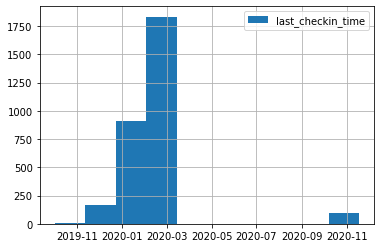

In [50]:
checkin_date.hist(legend=True)

In [54]:
len(checkin_date[checkin_date > pd.to_datetime('2020-10-01')])

96

In [53]:
df_merged['商品名称'].describe()

count                3025
unique                  1
top       iPad mini(第5世代)
freq                 3025
Name: 商品名称, dtype: object